In [ ]:
# Cameron Ela, ceela@usc.edu
# ECON 460, Fall 2023
# This notebook uses a neural network and a logistic regression to predict a stroke based
# on health and lifestyle qualities.
# Data: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

In [ ]:
# import CSV into a DataFrame
filename = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(filename)
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
# prepare DataFrame for transformation
df_clean = df.drop_duplicates()
df_clean.dropna(inplace=True)
df_clean.drop(columns="id", inplace=True)
df_clean.drop(df_clean[df_clean["smoking_status"] == "Unknown"].index, inplace=True)
df_clean["age"] = df_clean["age"].astype("int64")

# separate target from feature
feature = df_clean.drop(columns="stroke")
target = df_clean["stroke"]
print(feature)
print(target)

      gender  age  hypertension  heart_disease ever_married      work_type  \
0       Male   67             0              1          Yes        Private   
2       Male   80             0              1          Yes        Private   
3     Female   49             0              0          Yes        Private   
4     Female   79             1              0          Yes  Self-employed   
5       Male   81             0              0          Yes        Private   
...      ...  ...           ...            ...          ...            ...   
5100    Male   82             1              0          Yes  Self-employed   
5102  Female   57             0              0          Yes        Private   
5106  Female   81             0              0          Yes  Self-employed   
5107  Female   35             0              0          Yes  Self-employed   
5108    Male   51             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  

In [ ]:
# scale numeric features
numeric_columns = ["age", "avg_glucose_level", "bmi"]
numeric_inputs = feature[numeric_columns]
ss = StandardScaler()
numeric_inputs_tf = ss.fit_transform(numeric_inputs, target)

# get categorical features
cat_columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
cat_features = pd.get_dummies(feature[cat_columns], drop_first=True)
cat_columns_dummy = np.array(cat_features.columns)
print(cat_columns_dummy)

# create transformed features DataFrame
feature_tf = pd.DataFrame(feature)
for col, i, in zip(numeric_columns, range(len(numeric_columns))):
  feature_tf[col] = numeric_inputs_tf[:, i]
# adding dummy variables
for col in cat_columns:
  feature_tf.drop(columns=col, inplace=True)
for col, i, in zip(cat_columns_dummy, range(len(cat_columns_dummy))):
  feature_tf[col] = cat_features.iloc[:, i]

print(feature_tf.head())
print(feature_tf.columns)

['gender_Male' 'gender_Other' 'ever_married_Yes' 'work_type_Never_worked'
 'work_type_Private' 'work_type_Self-employed' 'work_type_children'
 'Residence_type_Urban' 'smoking_status_never smoked'
 'smoking_status_smokes']
        age  hypertension  heart_disease  avg_glucose_level       bmi  \
0  0.973768             0              1           2.523621  0.864982   
2  1.663479             0              1          -0.050358  0.302945   
3  0.018784             0              0           1.318923  0.563401   
4  1.610424             1              0           1.379514 -0.862253   
5  1.716533             0              0           1.632992 -0.176842   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            1             0                 1                       0   
2            1             0                 1                       0   
3            0             0                 1                       0   
4            0             0               

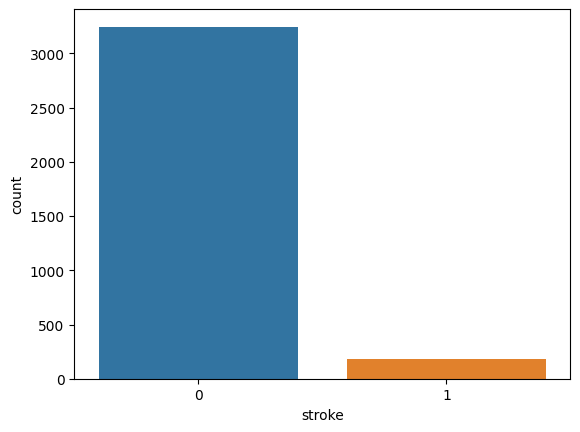

In [ ]:
# display distribution of stroke outcomes
sb.countplot(x=target)
plt.show()

In [ ]:
# split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    feature_tf, target, train_size=0.75, random_state=2023, stratify=target
)

In [ ]:
# build Sequential neural network
model = keras.Sequential()
model.add(keras.layers.Input(len(X_train.columns)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11801 (46.10 KB)
Trainable params: 11801 (46.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit Sequential model
h = model.fit(X_train, y_train, epochs=200, verbose=True)

Epoch 1/200
81/81 [==============================] - 6s 5ms/step - loss: 0.2553 - accuracy: 0.9416
Epoch 2/200
81/81 [==============================] - 0s 5ms/step - loss: 0.1792 - accuracy: 0.9475
Epoch 3/200
81/81 [==============================] - 0s 5ms/step - loss: 0.1744 - accuracy: 0.9475
Epoch 4/200
81/81 [==============================] - 0s 5ms/step - loss: 0.1724 - accuracy: 0.9478
Epoch 5/200
81/81 [==============================] - 0s 5ms/step - loss: 0.1695 - accuracy: 0.9475
Epoch 6/200
81/81 [==============================] - 0s 5ms/step - loss: 0.1675 - accuracy: 0.9478
Epoch 7/200
81/81 [==============================] - 0s 5ms/step - loss: 0.1655 - accuracy: 0.9482
Epoch 8/200
81/81 [==============================] - 0s 5ms/step - loss: 0.1657 - accuracy: 0.9475
Epoch 9/200
81/81 [==============================] - 0s 4ms/step - loss: 0.1631 - accuracy: 0.9475
Epoch 10/200
81/81 [==============================] - 0s 3ms/step - loss: 0.1608 - accuracy: 0.9482
Epoch 11/

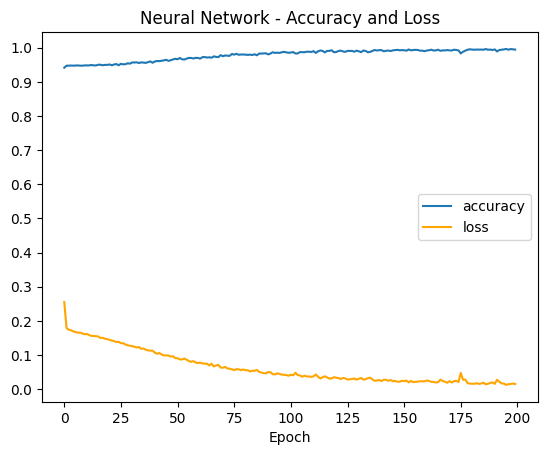

In [ ]:
# display accuracy and loss plots for neural network
plt.plot(h.history["accuracy"], label="accuracy")
plt.plot(h.history["loss"], c="orange", label="loss")
plt.yticks([i for i in np.arange(0, 1.1, 0.1)])
plt.xlabel("Epoch")
plt.title("Neural Network - Accuracy and Loss")
plt.legend()
plt.show()

27/27 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Neural Network - Threshold = 0.5')

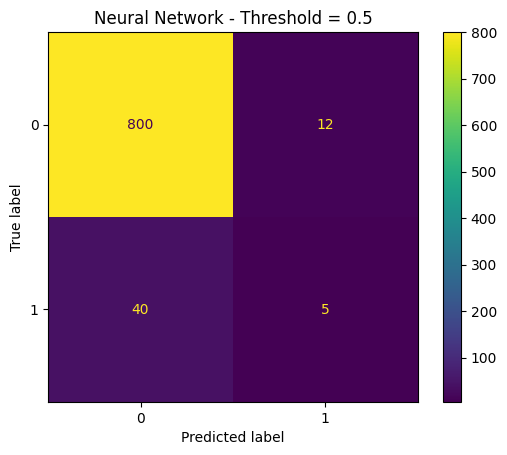

In [ ]:
# display confusion matrices
y_pred = model.predict(X_test)
# threshold = 0.5
thresh = np.where(y_pred > 0.5, 1, 0)
mat = confusion_matrix(y_test, thresh)
disp = ConfusionMatrixDisplay(mat)
disp.plot()
plt.title("Neural Network - Threshold = 0.5")

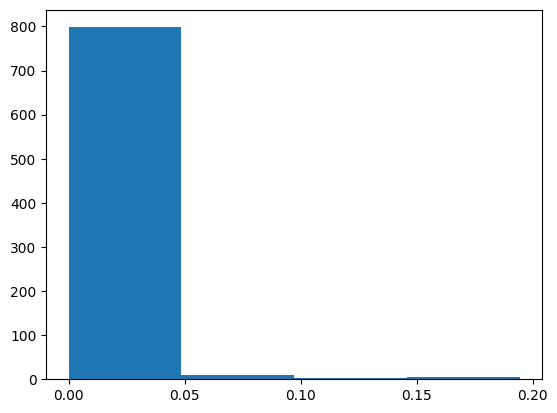

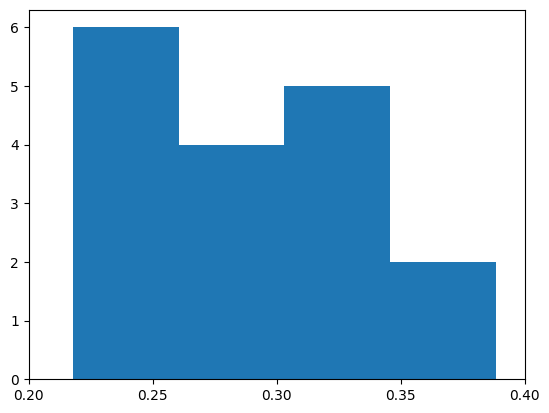

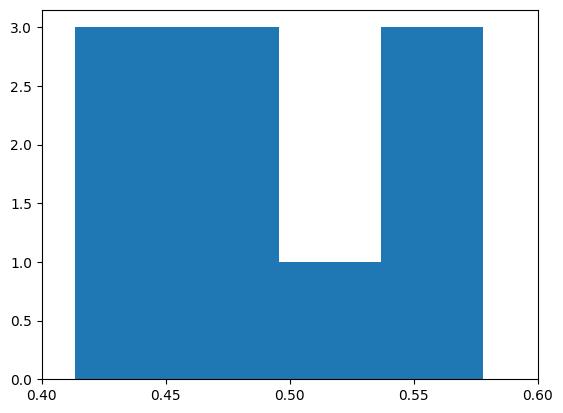

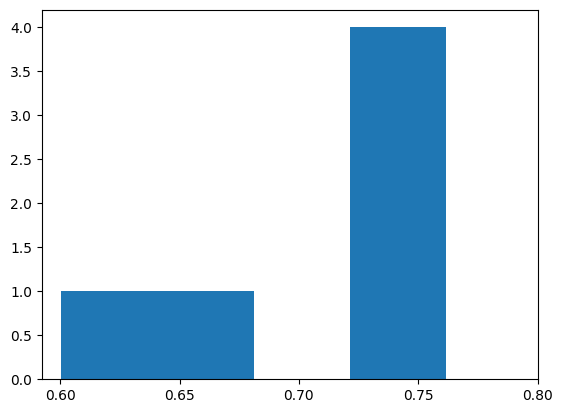

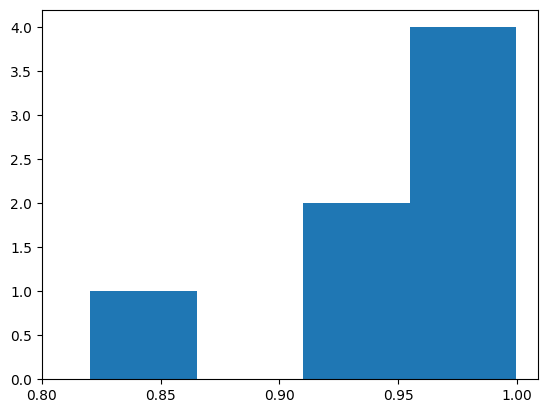

In [ ]:
# display distribution of prediction probabilities
for i in range(5):
  filtered_list = list(filter(lambda x: (x >= 0.2 * i and x <= 0.2 * (i + 1)), y_pred[:, 0]))
  plt.hist(filtered_list, bins=4, align="mid")
  plt.xticks([0.2 * i, 0.2 * (i + 0.25), 0.2 * (i + 0.5),
                      0.2 * (i + 0.75), 0.2 * (i + 1)])
  plt.show()

In [ ]:
# build logistic regression model
logit = LogisticRegression(random_state=2023, max_iter=200, verbose=True)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=2023, verbose=True)

In [ ]:
# display logit accuracy and loss
logit_pred = logit.predict(X_test)
print("Prediction accuracy:", accuracy_score(y_test, logit_pred))
print("Log loss:", log_loss(y_test, logit_pred))

Prediction accuracy: 0.9474912485414235
Log loss: 1.8926072374682288


Text(0.5, 1.0, 'Logistic Regression')

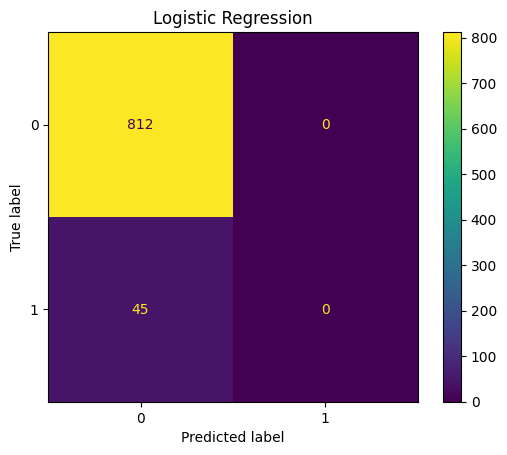

In [ ]:
# display logit confusion matrix
mat = confusion_matrix(y_test, logit_pred)
disp = ConfusionMatrixDisplay(mat)
disp.plot()
plt.title("Logistic Regression")

In [ ]:
# display coefficients
print("Coefficients")
print("=====================")
for col, coef in zip(feature_tf.columns, logit.coef_[0]):
  print(col, ": ", coef, sep="")

Coefficients
age: 1.1959363755275167
hypertension: 0.5162253626494951
heart_disease: 0.5923823199574957
avg_glucose_level: 0.23912042276691325
bmi: 0.0706743805367344
gender_Male: -0.14062575542187095
gender_Other: -0.0065479261399107565
ever_married_Yes: -0.004732191685760751
work_type_Never_worked: -0.02221560970721444
work_type_Private: 0.1943401631302338
work_type_Self-employed: 0.014224473751052449
work_type_children: -0.07993042941451706
Residence_type_Urban: 0.09051406508602255
smoking_status_never smoked: -0.15046215792086048
smoking_status_smokes: 0.28295452128162496
